# Summary of some variables

Firstly, give basic pictures of the variables we concern, including their simple relationship. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()


def bar_annotation(ax, option='number'):
    '''
    This function is to add according number or percentage on every bar
    option: number or percentage, default is number
    ax: the figure object
    '''
    try:
        if option == 'number':
            for i in ax.patches:
                ax1.text(i.get_x(), i.get_height()+.5, i.get_height(),
                         fontsize=15, color='dimgrey')
        if option == 'percentage':
            totals = []
            for i in ax.patches:
                totals.append(i.get_height())
                total = sum(totals)
            for i in ax.patches:
                ax.text(i.get_x(), i.get_height()+.5,
                        str(round((i.get_height()/total)*100, 2))+'%',
                        fontsize=15, color='dimgrey')
    except:
        return('inputs are wrong')


# -----------------------------------------------------------------------------------
# Load the medication tables
# -----------------------------------------------------------------------------------

pd.options.display.max_rows = 200
pd.options.display.max_columns = 10
root_dir = 'C:/Users/Administrator/Desktop/research/Hand_dirty/SAH_data/'
enc_med_cl2 = pd.read_csv(root_dir+'medication/sah_pts_enc_med_sl_ad_cl2.tsv',
                          delimiter='\t')
enc_med_cl3 = pd.read_csv(root_dir+'medication/sah_pts_all_enc_med_cl3.tsv',
                          delimiter='\t')
# In order to get the dose quantity,
# we need to merge some columns between enc_med_cl2 and enc_med_cl3
enc_med_cl2 = pd.merge(enc_med_cl2, enc_med_cl3[['INDEX_ID', 'DOSE_QUANTITY',
                       'ORDER_NO', 'TOTAL_DISPENSED_DOSES', 'CREDIT_QUANTITY',
                       'CHARGE_QUANTITY', 'INFUSION_RATE', 'INFUSION_TIME',
                       'DOSE_FORM_DESCRIPTION', 'ROUTE_DESCRIPTION']],
                        on='INDEX_ID')

## Encounter id

Number of unique encounter id is 4881. 

In [2]:
enc_med_cl2['ENCOUNTER_ID'].nunique() 

4881

## Medication id

Number of unique medication id is 70. Similarily, number of unique NDC code is 70. They are one-to-one mapping for the SAH medication table. 

In [3]:
enc_med_cl2['MEDICATION_ID'].nunique()  # 70
enc_med_cl2.groupby('GENERIC_NAME')['MEDICATION_ID'].nunique()
# Load NDC_codes information
vasopressor_ndc_codes = pd.read_csv(
        root_dir+'medication/list of vasopressors with ndc codes.tsv',
        delimiter='\t')
vasopressor_ndc_codes = vasopressor_ndc_codes[[
        'MEDICATION_ID', 'NDC_CODE']].drop_duplicates()
vasopressor_ndc_codes['MEDICATION_ID'].nunique()
vasopressor_ndc_codes['NDC_CODE'].nunique()
enc_med_cl2 = pd.merge(vasopressor_ndc_codes, enc_med_cl2, on='MEDICATION_ID',
                       how='inner')
# NDC code:0517-1805-25 to verify my 

## Dose units

Unique values and their counts of dose units are follwing.

In [4]:
enc_med_cl2['DOSE_UNITS'].unique()
enc_med_cl2['DOSE_UNITS'].value_counts(dropna=False)

EA         8536
Bag        1989
VL         1835
mL          819
Amp         733
Syringe     241
Inj          11
NaN           4
Name: DOSE_UNITS, dtype: int64

## Dose form description

We only have one unique form: solution

In [5]:
enc_med_cl2['DOSE_FORM_DESCRIPTION'].unique()
enc_med_cl2['DOSE_FORM_DESCRIPTION'].value_counts(dropna=False)

solution    14168
Name: DOSE_FORM_DESCRIPTION, dtype: int64

## Route description


This variable describes how the medicine is administrated into the body. 

In [6]:
enc_med_cl2['ROUTE_DESCRIPTION'].unique()
enc_med_cl2['ROUTE_DESCRIPTION'].value_counts(dropna=False)

injectable     6706
intravenous    6632
NaN             830
Name: ROUTE_DESCRIPTION, dtype: int64

## Product strength description

The concentration for the medicine


In [6]:
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'].unique()
# Unify the unit in PRODUCT_STRENGTH_DESRIPTION,
# because some with ml but some with mL
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'] = enc_med_cl2[
        'PRODUCT_STRENGTH_DESCRIPTION'].str.replace("mL", "ml")
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'].unique()
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'].value_counts(dropna=False)

10 mg/ml                 5277
1 mg/ml                  3569
NaN                      2084
5%-160 mg/100 ml         1187
5%-320 mg/100 ml         1004
4 mg/250 ml-NaCl 0.9%     678
80 mg/ml                  186
40 mg/ml                  138
5%-80 mg/100 ml            32
100 mcg/ml-NaCl 0.9%        7
160 mg/ml                   4
8 mg/250 ml-NaCl 0.9%       2
Name: PRODUCT_STRENGTH_DESCRIPTION, dtype: int64

The relationship between the generic name, product strength description and NDC codes:


In [14]:
enc_med_cl2.groupby(['GENERIC_NAME', 'PRODUCT_STRENGTH_DESCRIPTION'])[
        'NDC_CODE'].value_counts(dropna=False)

GENERIC_NAME    PRODUCT_STRENGTH_DESCRIPTION  NDC_CODE   
dopamine        160 mg/ml                     517130525         4
                40 mg/ml                      517180525       118
                                              74910420          9
                                              409582001         5
                                              186063901         2
                                              74582001          1
                                              74582010          1
                                              409910420         1
                                              590004006         1
                5%-160 mg/100 ml              338100702       457
                                              74780922        411
                                              409780922       217
                                              409780924        56
                                              264514820        19
                  

The relationship between generic name, route description and product strength description

In [13]:
enc_med_cl2.groupby(['GENERIC_NAME', 'ROUTE_DESCRIPTION'])[
        'PRODUCT_STRENGTH_DESCRIPTION'].value_counts(dropna=False)

GENERIC_NAME    ROUTE_DESCRIPTION  PRODUCT_STRENGTH_DESCRIPTION
dopamine        intravenous        5%-160 mg/100 ml                1187
                                   5%-320 mg/100 ml                1004
                                   80 mg/ml                         186
                                   40 mg/ml                         138
                                   5%-80 mg/100 ml                   32
                                   160 mg/ml                          4
norepinephrine  injectable         4 mg/250 ml-NaCl 0.9%            678
                                   NaN                              569
                                   8 mg/250 ml-NaCl 0.9%              2
                intravenous        1 mg/ml                         3569
                                   NaN                              152
phenylephrine   injectable         10 mg/ml                        5277
                                   NaN                              180


## Order strength

Now we assume the unit for the strength is mg, later I will prove it.


### Different values and according counts

Note the number of missing values.

In [9]:
enc_med_cl2['ORDER_STRENGTH'].value_counts(dropna=False)

NaN           6012
 800.0000     1065
 400.0000      933
 8.0000        862
 2.0000        812
 4.0000        777
 40.0000       638
 10.0000       609
 50.0000       553
 16.0000       522
 20.0000       279
 80.0000       265
 100.0000      193
 1.0000        108
 0.0000         88
 200.0000       81
 160.0000       53
 32.0000        45
 0.1000         43
 30.0000        39
 64.0000        31
 12.0000        13
 0.2000         12
 1600.0000      11
 120.0000       10
 25.0000         6
 60.0000         6
 0.0500          4
 0.1500          3
 3.0000          3
 320.0000        3
 0.3900          2
 1.5600          2
 6.0000          2
 0.8000          2
 3.5400          1
 2.5800          1
 2.9400          1
 0.1750          1
 0.5678          1
 2400.0000       1
 0.9180          1
 2.7200          1
 115.2800        1
 0.3540          1
 1.3000          1
 250.0000        1
 0.4700          1
 7.7300          1
 0.8600          1
 1280.0000       1
 3.7332          1
 7.6307     

### Distribution


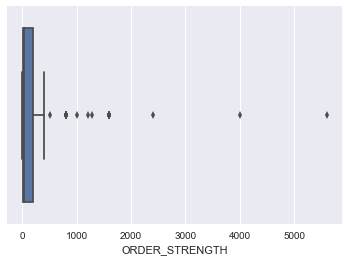

In [10]:
sns.boxplot(enc_med_cl2['ORDER_STRENGTH'])

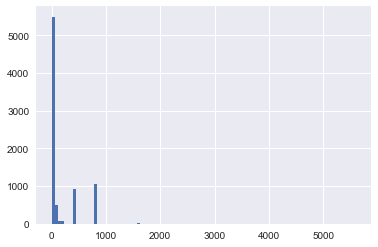

In [11]:
enc_med_cl2['ORDER_STRENGTH'].hist(bins=100)

Text(0,0.5,'Counts')

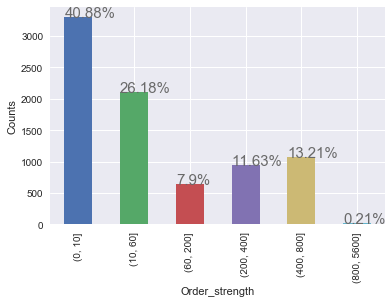

In [15]:
enc_med_cl2['order_strength_cutted'] = pd.cut(
        enc_med_cl2['ORDER_STRENGTH'], bins)
ax1 = pd.value_counts(enc_med_cl2['order_strength_cutted'],
                      sort=False).plot(kind='bar')
bar_annotation(ax1, 'percentage')
ax1.set_xlabel('Order_strength')
ax1.set_ylabel('Counts')

### Detail

#### The relationship between order strength and route description: 

In [17]:
enc_med_cl2.groupby(['order_strength_cutted'])[
        'ROUTE_DESCRIPTION'].value_counts(dropna=False)

order_strength_cutted  ROUTE_DESCRIPTION
(0, 10]                intravenous          1792
                       injectable           1442
                       NaN                    64
(10, 60]               injectable           1556
                       intravenous           554
                       NaN                     2
(60, 200]              injectable            502
                       intravenous            97
                       NaN                    38
(200, 400]             intravenous           930
                       injectable              7
                       NaN                     1
(400, 800]             intravenous          1065
                       NaN                     1
(800, 5600]            intravenous            15
                       injectable              2
Name: ROUTE_DESCRIPTION, dtype: int64

#### Extreme values of order strength

##### order strength is over 800

In [33]:
threshold = 800
# order strength > 800
os_over800 = enc_med_cl2.query('ORDER_STRENGTH > @threshold')
os_over800[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY', 'ORDER_STRENGTH',
            'ORDER_VOLUME', 'PRODUCT_STRENGTH_DESCRIPTION',
            'ROUTE_DESCRIPTION']]

,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,ORDER_STRENGTH,ORDER_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION
33,517180525,8,24,1600.0,40.0,40 mg/ml,intravenous
98,517180525,5,5,1000.0,25.0,40 mg/ml,intravenous
1040,338100702,4,32,1600.0,1000.0,5%-160 mg/100 ml,intravenous
1854,338100902,2,14,1600.0,500.0,5%-320 mg/100 ml,intravenous
1874,338100902,3,3,2400.0,750.0,5%-320 mg/100 ml,intravenous
1894,338100902,2,2,1600.0,500.0,5%-320 mg/100 ml,intravenous
2027,338100902,7,7,5600.0,1750.0,5%-320 mg/100 ml,intravenous
2104,338100902,5,5,4000.0,1250.0,5%-320 mg/100 ml,intravenous
2115,338100902,2,2,1600.0,500.0,5%-320 mg/100 ml,intravenous
2127,338100902,2,2,1600.0,500.0,5%-320 mg/100 ml,intravenous


All of them are strong in concentration. So it seems like the medicine with NDC code 338100902 is strong. One of the observations with route administration as injection is suspicious. One is wrong for the order strength. Note the consumed quantity.

##### Order strength = 800


Number of observations: 1065

In [34]:
# order strength = 800
os_800 = enc_med_cl2.query('ORDER_STRENGTH == @threshold')
os_800[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY', 'ORDER_STRENGTH',
        'ORDER_VOLUME', 'PRODUCT_STRENGTH_DESCRIPTION', 'ROUTE_DESCRIPTION']]

,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,ORDER_STRENGTH,ORDER_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION
0,517130525,1,7,800.0,NaN,160 mg/ml,intravenous
1,517130525,1,10,800.0,5.0,160 mg/ml,intravenous
2,517130525,1,7,800.0,NaN,160 mg/ml,intravenous
3,517130525,1,7,800.0,NaN,160 mg/ml,intravenous
11,74582010,1,24,800.0,500.0,40 mg/ml,intravenous
12,74910420,2,2,800.0,20.0,40 mg/ml,intravenous
13,74910420,2,4,800.0,20.0,40 mg/ml,intravenous
14,74910420,2,4,800.0,20.0,40 mg/ml,intravenous
15,74910420,2,2,800.0,20.0,40 mg/ml,intravenous
16,74910420,2,2,800.0,20.0,40 mg/ml,intravenous


Look at the concentration

In [35]:
os_800['PRODUCT_STRENGTH_DESCRIPTION'].value_counts()

5%-320 mg/100 ml    904
40 mg/ml             68
5%-160 mg/100 ml     51
80 mg/ml             38
160 mg/ml             4
Name: PRODUCT_STRENGTH_DESCRIPTION, dtype: int64

See their association with concentration, NDC code and order volume

In [36]:
os_800.groupby(['PRODUCT_STRENGTH_DESCRIPTION', 'NDC_CODE'])[
        'ORDER_VOLUME'].value_counts(dropna=False)

PRODUCT_STRENGTH_DESCRIPTION  NDC_CODE   ORDER_VOLUME
160 mg/ml                     517130525  NaN               3
                                         5.0               1
40 mg/ml                      74582010   500.0             1
                              74910420   20.0              7
                              517180525  20.0             59
                                         0.0               1
5%-160 mg/100 ml              74780922   500.0             1
                              74780924   500.0             5
                              338100702  500.0             3
                              338100703  NaN               5
                                         500.0             4
                              409780924  500.0            33
5%-320 mg/100 ml              74781022   10.0            190
                                         0.0             139
                                         250.0           110
                               

Pay attention to the concentration '5%-320 mg/100 ml' and NDC code with 74781022.   
Value counts of dose quantity of concentration with '5%-320 mg/100 ml': 

In [37]:
os_800_pst320 = os_800.query(
        'PRODUCT_STRENGTH_DESCRIPTION =="5%-320 mg/100 ml"')
os_800_pst320['DOSE_QUANTITY'].value_counts()

1    904
Name: DOSE_QUANTITY, dtype: int64

NDC code = 74781022. Number of observations: 452. Be aware of order volume and total volume. 

In [38]:
NDC_CODE_74781022 = os_800.query('NDC_CODE==74781022')
NDC_CODE_74781022[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY',
                   'ORDER_STRENGTH', 'ORDER_VOLUME', 'TOTAL_VOLUME',
                   'PRODUCT_STRENGTH_DESCRIPTION', 'ROUTE_DESCRIPTION']]

,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,ORDER_STRENGTH,ORDER_VOLUME,TOTAL_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION
1356,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1357,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1358,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1359,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1360,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous
1361,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous
1362,74781022,1,2,800.0,0.0,250,5%-320 mg/100 ml,intravenous
1363,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous
1364,74781022,1,2,800.0,0.0,250,5%-320 mg/100 ml,intravenous
1365,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous


###### Check the consumed quantity

In [39]:
os_800['CONSUMED_QUANTITY'].describe()

count    1065.000000
mean       11.259155
std        41.551020
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       720.000000
Name: CONSUMED_QUANTITY, dtype: float64

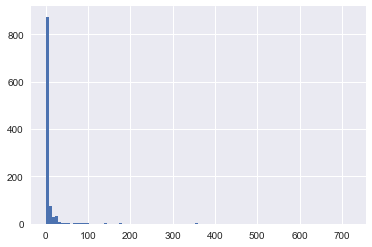

In [41]:
os_800['CONSUMED_QUANTITY'].hist(bins=100)

Text(0,0.5,'Counts')

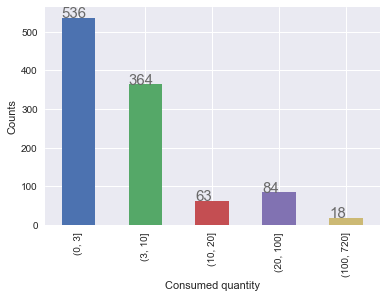

In [42]:
bins = [0, 3, 10, 20, 100, 720]
bins_vector = pd.cut(os_800['CONSUMED_QUANTITY'], bins)
ax1 = pd.value_counts(bins_vector, sort=False).plot(kind='bar')
bar_annotation(ax1, 'number')
ax1.set_xlabel('Consumed quantity')
ax1.set_ylabel('Counts')

We can use the total dispensed doses, initial dose quantity and time gap between the medication strarted time and stopped time to double check. 

## Dose quantity

In [20]:
enc_med_cl2['DOSE_QUANTITY'].describe()

count    14168.000000
mean         2.751623
std         15.366580
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        500.000000
Name: DOSE_QUANTITY, dtype: float64